In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import openmensa

In [2]:
pd.plotting.register_matplotlib_converters()
sns.set(style="darkgrid")

In [10]:
meals = openmensa.load_csvs("*.csv")
meals.sort_values("date").tail()

,mensa_id,date,meal_id,name,category,price_student,notes
27913,Philipps Bistro,2020-02-07,4894260,Vegetarische Frühlingsrolle mit Tomatensauce u...,Abendgericht vegetarisch,2.75,"['glutenhaltiges Getreide', 'mit Farbstoff', '..."
27914,Philipps Bistro,2020-02-07,4894261,Steinbeisser mit Sauce Hollandaise,Bistro Gourmet Fisch,4.85,"['glutenhaltiges Getreide', 'Soja', 'Eier', 'F..."
27915,Philipps Bistro,2020-02-07,4894262,Cordon bleu mit Schinken und Käse gefüllt dazu...,Bistro Gourmet Fleisch,4.60,"['mit Konservierungsstoff', 'mit Antioxidation..."
8587,Mensa Erlenring,2020-02-07,4893723,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.35,"['Milch', 'glutenhaltiges Getreide', 'Eier']"
32080,Mo's Diner,2020-02-07,4893801,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.45,"['Milch', 'glutenhaltiges Getreide', 'Eier']"


In [4]:
category_aliases = [
    ("Menü", "Menü 1"),
    ("Menü vegetarisch", "Menü 2 vegetarisch"),
    ("Vital Linie", "Vital-Linie"),
    ("Menü 3", "Vital-Linie"),
    ("Wochenhit/Pastateller", "Wochenhit"),
    ("Menü I", "Menü 1"),
    ("Menü II vegetarisch", "Menü 2 vegetarisch"),
    ("Menü III", "Menü 3")]

for old, new in category_aliases:
    meals.loc[meals["category"] == old, ["category"]] = new

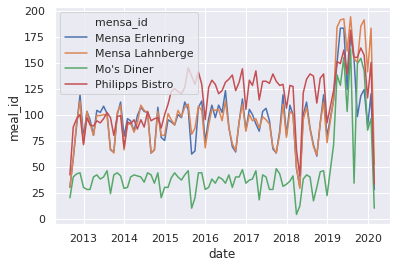

In [5]:
overview = meals.groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview)

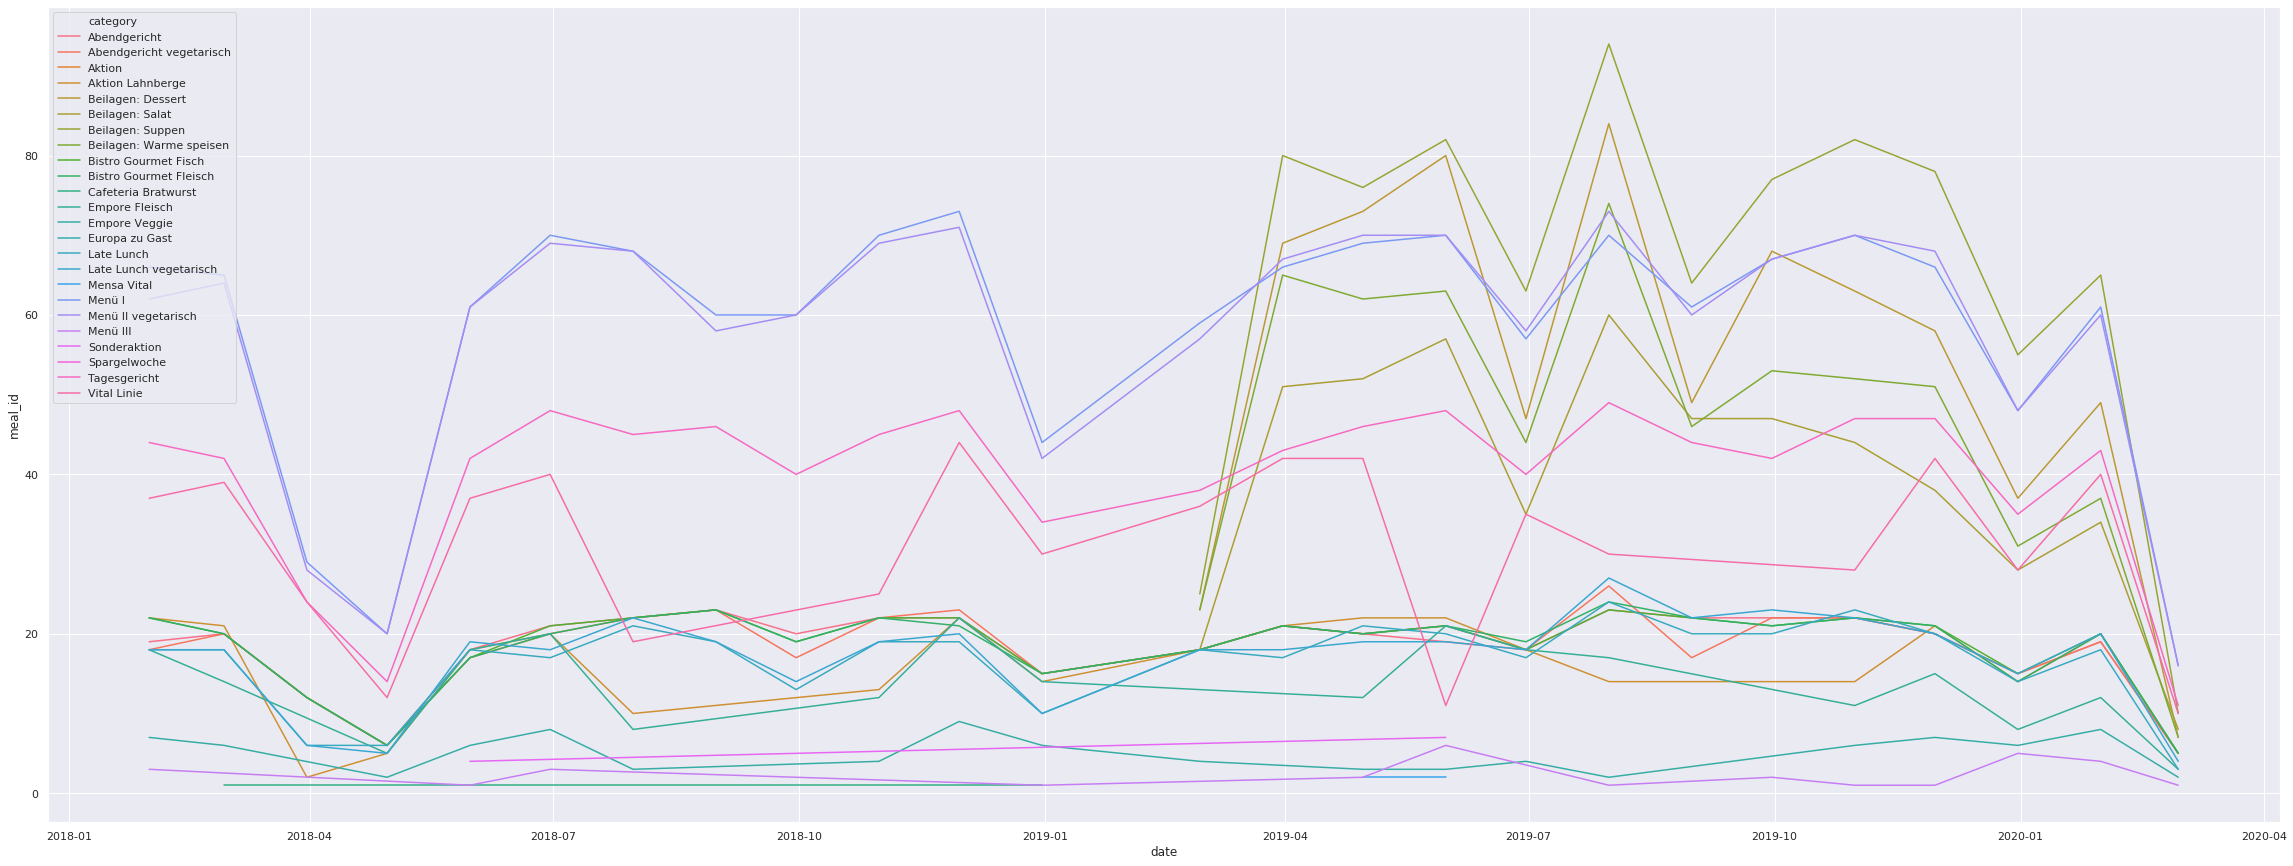

In [31]:
overview_cat = meals[meals.date >= "2018-01-01"].groupby(
    ["category", pd.Grouper(key="date", freq="1M")]).count()["meal_id"].reset_index()

plt.figure(figsize=(40, 15))
sns.lineplot(x="date", y="meal_id", hue="category", data=overview_cat)

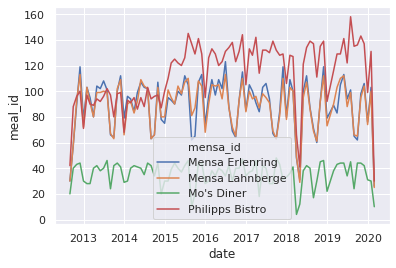

In [7]:
overview_side = meals[~meals.category.str.contains("Beilagen")].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview_side)

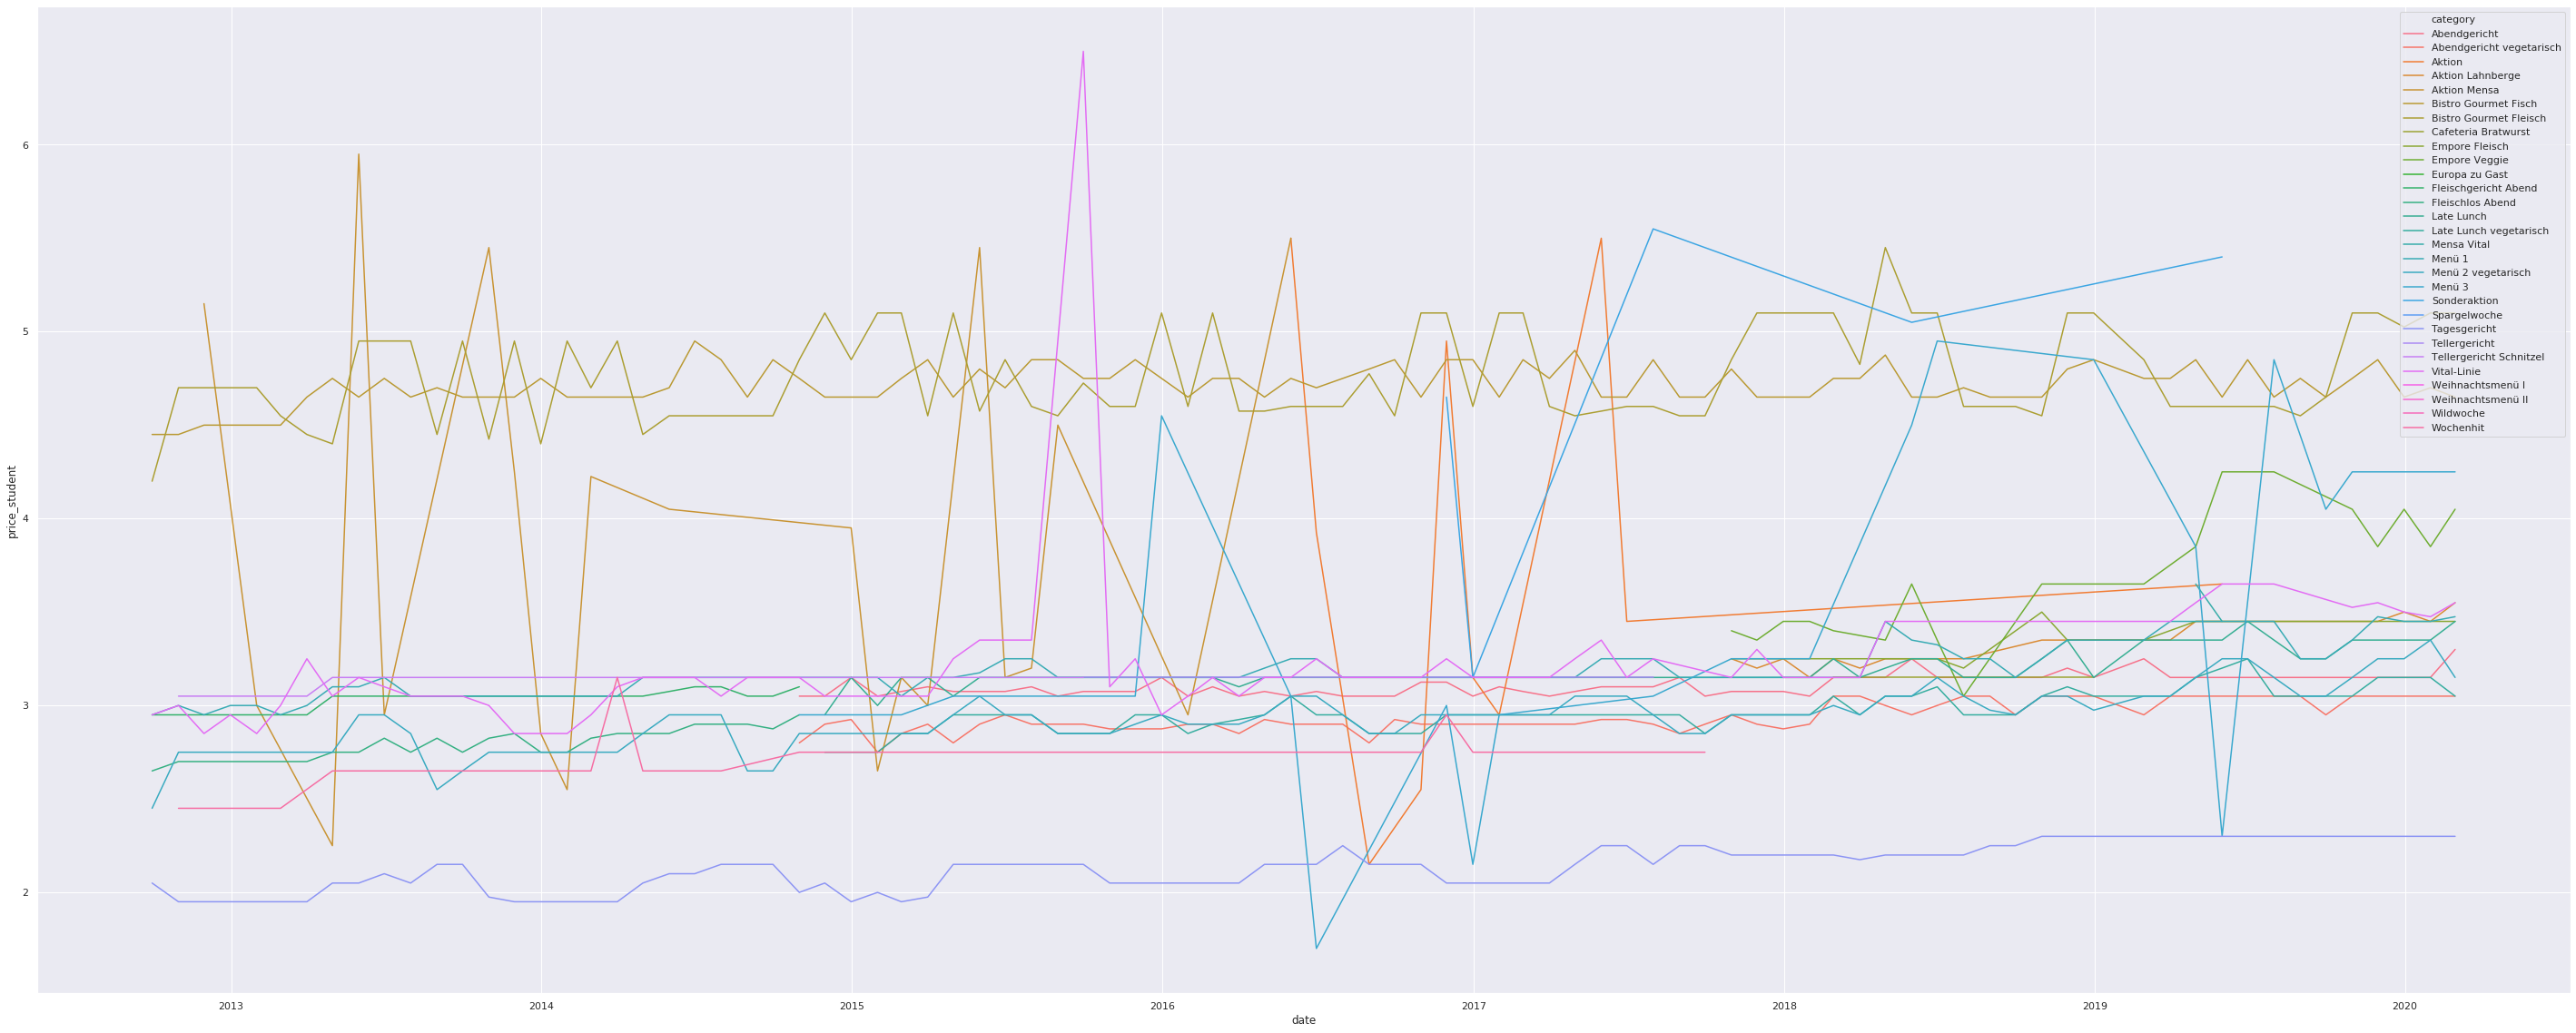

In [8]:
# ignore elements without a price and the golden Hetax-Käse for EUR 295
meals_cat = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["category", pd.Grouper(key="date", freq="M")])["price_student"].median().reset_index()

plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_student", hue="category", data=meals_cat)

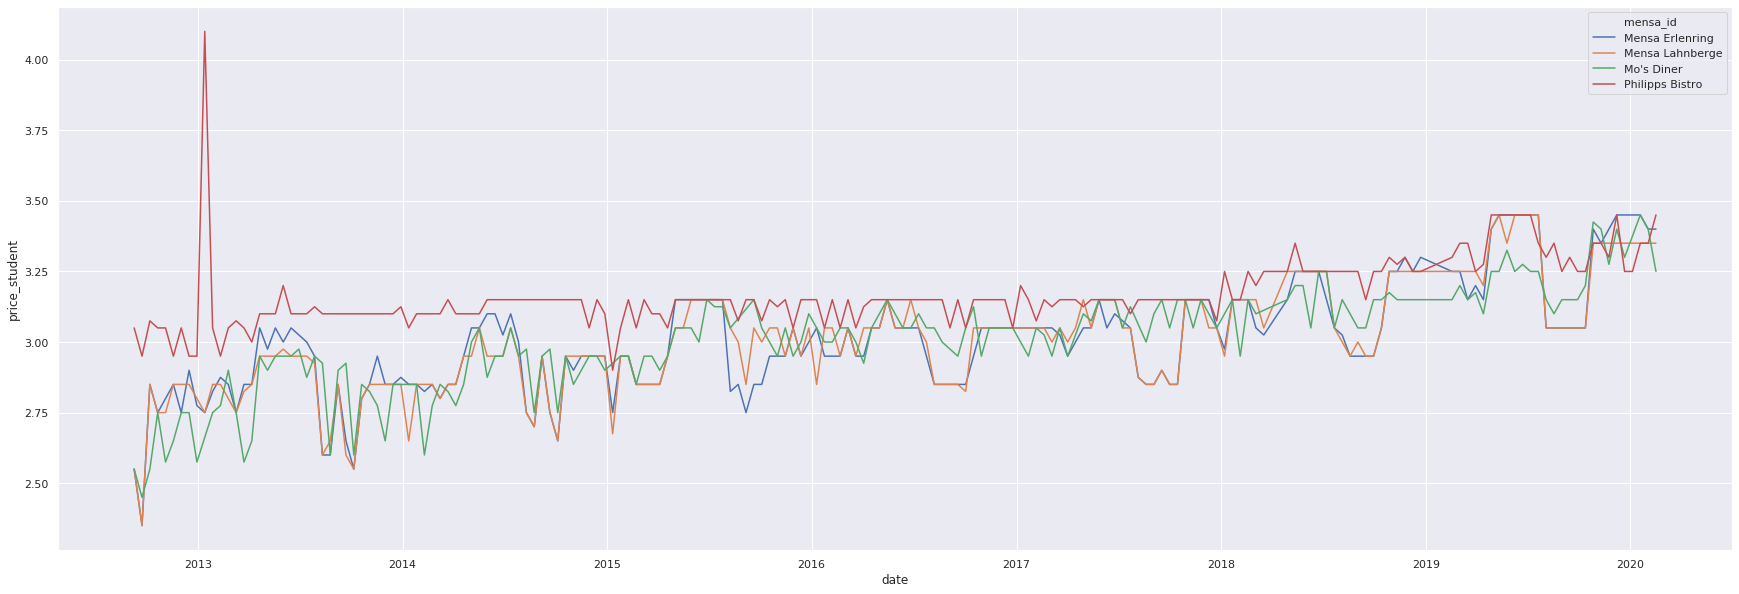

In [9]:
# ignore elements without a price and the golden Hetax-Käse for EUR 295
meals_mensa = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="2W")])["price_student"].median().reset_index()

plt.figure(figsize=(30, 10))
sns.lineplot(x="date", y="price_student", hue="mensa_id", data=meals_mensa)

In [44]:
meals_hot = meals.name.value_counts().to_frame().reset_index().rename(columns={"index":"name", "name":"count"})
meals_hot.head(20)

,name,count
0,Ananasquark,182
1,Gebackenes Schweineschnitzel mit Pommes frites...,171
2,Bratkartoffeln,170
3,Banane (Obst 1 Stück) -vegan,163
4,Gebackenes Seelachsfilet mit Remouladensauce,150
5,Schweineschnitzel mit Pommes-frites und gemisc...,129
6,Gebackenes Putenschnitzel mit Basilikumsauce,123
7,Brokkoli-Nußecke mit Tomatensauce,116
8,Pfannengyros mit Tzatziki,108
9,Herzhaftes Rindergulasch mit Pilzen,97


In [47]:
meals_hot.loc[meals_hot.name.str.contains("Schweineschnitzel")].head(20)

,name,count
1,Gebackenes Schweineschnitzel mit Pommes frites...,171
5,Schweineschnitzel mit Pommes-frites und gemisc...,129
11,Gebackenes Schweineschnitzel mit Pommes frites...,91
18,Gebackenes Schweineschnitzel mit Paprikasauce ...,67
21,Gebackenes Schweineschnitzel mit Pommes frites...,63
30,Gebackenes Schweineschnitzel mit Jägersauce un...,57
33,Gebackenes Schweineschnitzel mit Pommes frites...,55
37,Gebackenes Schweineschnitzel mit Pommes frites...,54
46,Gebackenes Schweineschnitzel mit Pommes frites...,50
58,Gebackenes Schweineschnitzel mit Pommes frites...,40
